In [95]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


#Ustunlar ta'rifi
    location - sotilayotgan uy manzili
    district - uy joylashgan tuman
    rooms - xonalar soni
    size - uy maydoni (kv.m)
    level - uy joylashgan qavat
    max_levels - ja'mi qavatlar soni
    price - uy narxi

In [96]:
import sklearn

In [97]:
df.shape

(7565, 7)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [100]:
a = df.copy()
a.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [101]:
errind = a[a.price=='Договорная'].index
errind

Int64Index([ 202,  411,  439,  460,  507,  521,  522,  523,  584,  800,  873,
             880,  882,  883,  886,  892,  988, 1027, 1318, 1541, 1601, 1804,
            1805, 2004, 2006, 2580, 2625, 2673, 2705, 2797, 2894, 2942, 3431,
            3436, 3454, 3455, 3456, 3470, 3495, 3510, 3528, 3535, 3536, 3572,
            3574, 3589, 3605, 3637, 3677, 3711, 3712, 3713, 3714, 4061, 4158,
            4188, 4278, 4298, 4328, 4361, 4420, 4425, 4453, 4659, 4746, 4747,
            4879, 5002, 5003, 5004, 5105, 5637, 5801, 5838, 5848, 5887, 5920,
            6099, 6542, 6602, 6603, 6604, 6605, 6606, 6607, 6608, 6639, 6662,
            6738, 6819, 6836, 6843, 6859, 6954, 7039, 7196, 7323, 7403, 7404],
           dtype='int64')

In [102]:
for ind in errind:
  a.drop(ind, inplace=True)

In [103]:
a['price'] = a['price'].astype(int)
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7466 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7466 non-null   object
 1   district    7466 non-null   object
 2   rooms       7466 non-null   int64 
 3   size        7466 non-null   object
 4   level       7466 non-null   int64 
 5   max_levels  7466 non-null   int64 
 6   price       7466 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 466.6+ KB


In [104]:
eind = a[a['size']=='Площадьземли:1сот'].index
for ind in eind:
  a.drop(ind, inplace=True)

a['size'] = a['size'].astype(float)
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7465 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7465 non-null   object 
 1   district    7465 non-null   object 
 2   rooms       7465 non-null   int64  
 3   size        7465 non-null   float64
 4   level       7465 non-null   int64  
 5   max_levels  7465 non-null   int64  
 6   price       7465 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 466.6+ KB


In [106]:
a.describe()

,rooms,size,level,max_levels,price
count,7465.000000,7465.000000,7465.000000,7465.000000,7.465000e+03
mean,2.622103,113.537018,3.693771,6.023979,7.132367e+04
std,1.083155,1501.157996,2.236905,2.607103,6.405659e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,65.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


In [108]:
for i in a[a.price>650000].index:
  a.drop(i, inplace=True)

a.describe()

,rooms,size,level,max_levels,price
count,7454.000000,7454.000000,7454.000000,7454.000000,7454.000000
mean,2.619801,113.490588,3.694526,6.024416,58844.810169
std,1.076848,1502.254137,2.237161,2.607968,45168.149829
min,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,3.000000,65.000000,3.000000,5.000000,46000.000000
75%,3.000000,85.000000,5.000000,9.000000,66500.000000
max,10.000000,70000.000000,19.000000,25.000000,644000.000000


In [110]:
for i in a[a.price<10000].index:
  a.drop(i, inplace=True)

a.describe()

,rooms,size,level,max_levels,price
count,7441.000000,7441.000000,7441.000000,7441.000000,7441.000000
mean,2.619540,113.473436,3.696412,6.026341,58940.444833
std,1.074004,1503.552039,2.237906,2.608269,45149.347175
min,1.000000,1.000000,1.000000,1.000000,10000.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,3.000000,65.000000,3.000000,5.000000,46500.000000
75%,3.000000,85.000000,5.000000,9.000000,66847.000000
max,10.000000,70000.000000,19.000000,25.000000,644000.000000


In [123]:
id = a[a['size']>20].index
a.drop(index=id, inplace=True)
a.describe()

,rooms,size,level,max_levels,price
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1.480769,16.115385,2.711538,4.423077,23734.576923
std,1.320879,5.523369,1.418872,1.850767,32682.603946
min,1.000000,1.000000,1.000000,1.000000,10000.000000
25%,1.000000,16.525000,2.000000,4.000000,12250.000000
50%,1.000000,18.000000,3.000000,4.000000,14250.000000
75%,1.000000,20.000000,3.000000,4.000000,18125.000000
max,8.000000,20.000000,7.000000,9.000000,230000.000000


In [124]:
a.corrwith(a['price']).sort_values()

size         -0.516435
max_levels   -0.172571
level        -0.031408
rooms         0.913328
price         1.000000
dtype: float64

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

hous = a.copy()
hous.describe()

,rooms,size,level,max_levels,price
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1.480769,16.115385,2.711538,4.423077,23734.576923
std,1.320879,5.523369,1.418872,1.850767,32682.603946
min,1.000000,1.000000,1.000000,1.000000,10000.000000
25%,1.000000,16.525000,2.000000,4.000000,12250.000000
50%,1.000000,18.000000,3.000000,4.000000,14250.000000
75%,1.000000,20.000000,3.000000,4.000000,18125.000000
max,8.000000,20.000000,7.000000,9.000000,230000.000000


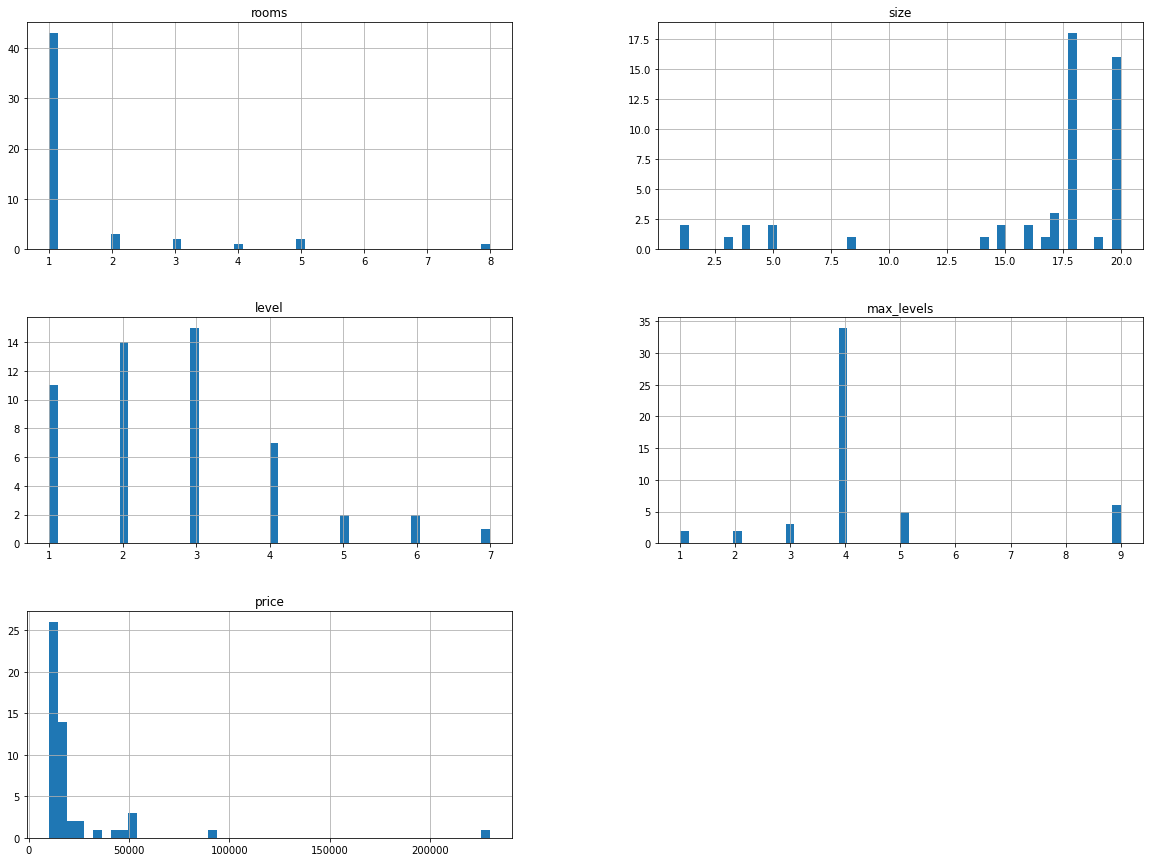

In [129]:
hous.hist(bins=50, figsize=(20,15))
plt.show()

In [133]:
hous.shape

(52, 7)

In [134]:
hous.to_csv('Tashkent city.csv')